Question 1 and Question 2

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('training.csv')
del df['PIDN']
del df['Depth']
df.head()

,m7497.96,m7496.04,m7494.11,m7492.18,m7490.25,m7488.32,m7486.39,m7484.46,m7482.54,m7480.61,...,REF3,REF7,RELI,TMAP,TMFI,Ca,P,pH,SOC,Sand
0,0.302553,0.301137,0.299748,0.300354,0.302679,0.303799,0.301702,0.298936,0.298126,0.298120,...,-0.722567,-0.646673,1.687734,0.190708,0.056843,-0.295749,-0.041336,-1.129366,0.353258,1.269748
1,0.270192,0.268555,0.266964,0.267938,0.271013,0.272346,0.269870,0.266976,0.266544,0.266766,...,-0.722567,-0.646673,1.687734,0.190708,0.056843,-0.387442,-0.231552,-1.531538,-0.264023,1.692209
2,0.317433,0.316265,0.314948,0.315224,0.316942,0.317764,0.316067,0.313874,0.313301,0.313296,...,-0.832298,-0.814516,1.806660,0.190708,0.056843,-0.248601,-0.224635,-0.259551,0.064152,2.091835
3,0.261116,0.259767,0.258384,0.259001,0.261310,0.262417,0.260534,0.258039,0.257246,0.257124,...,-0.832298,-0.814516,1.806660,0.190708,0.056843,-0.332195,-0.318014,-0.577548,-0.318719,2.118477
4,0.260038,0.258425,0.256544,0.257030,0.259602,0.260786,0.258717,0.256352,0.255902,0.255822,...,-0.795031,-0.780242,0.430513,0.190708,0.056843,-0.438350,-0.010210,-0.699135,-0.310905,2.164148


In [3]:
SOC = df['SOC']
del df['SOC']
SOC.head()

0    0.353258
1   -0.264023
2    0.064152
3   -0.318719
4   -0.310905
Name: SOC, dtype: float64

In [4]:
pH = df['pH']
del df['pH']
pH.head()

0   -1.129366
1   -1.531538
2   -0.259551
3   -0.577548
4   -0.699135
Name: pH, dtype: float64

In [5]:
P = df['P']
del df['P']
P.head()

0   -0.041336
1   -0.231552
2   -0.224635
3   -0.318014
4   -0.010210
Name: P, dtype: float64

In [6]:
Ca = df['Ca']
del df['Ca']
Ca.head()

0   -0.295749
1   -0.387442
2   -0.248601
3   -0.332195
4   -0.438350
Name: Ca, dtype: float64

In [7]:
Sand = df['Sand']
del df['Sand']
Sand.head()

0    1.269748
1    1.692209
2    2.091835
3    2.118477
4    2.164148
Name: Sand, dtype: float64

In [8]:
df.head()

,m7497.96,m7496.04,m7494.11,m7492.18,m7490.25,m7488.32,m7486.39,m7484.46,m7482.54,m7480.61,...,EVI,LSTD,LSTN,REF1,REF2,REF3,REF7,RELI,TMAP,TMFI
0,0.302553,0.301137,0.299748,0.300354,0.302679,0.303799,0.301702,0.298936,0.298126,0.298120,...,1.062682,-0.716713,-0.090016,-0.861091,-0.537106,-0.722567,-0.646673,1.687734,0.190708,0.056843
1,0.270192,0.268555,0.266964,0.267938,0.271013,0.272346,0.269870,0.266976,0.266544,0.266766,...,1.062682,-0.716713,-0.090016,-0.861091,-0.537106,-0.722567,-0.646673,1.687734,0.190708,0.056843
2,0.317433,0.316265,0.314948,0.315224,0.316942,0.317764,0.316067,0.313874,0.313301,0.313296,...,1.156705,-1.282552,-0.088336,-0.935273,-0.631725,-0.832298,-0.814516,1.806660,0.190708,0.056843
3,0.261116,0.259767,0.258384,0.259001,0.261310,0.262417,0.260534,0.258039,0.257246,0.257124,...,1.156705,-1.282552,-0.088336,-0.935273,-0.631725,-0.832298,-0.814516,1.806660,0.190708,0.056843
4,0.260038,0.258425,0.256544,0.257030,0.259602,0.260786,0.258717,0.256352,0.255902,0.255822,...,1.191691,-1.206971,0.011420,-0.906182,-0.528757,-0.795031,-0.780242,0.430513,0.190708,0.056843


In [9]:
X = df.as_matrix()
X.shape

(1157, 3593)

In [10]:
Y_SOC = SOC.as_matrix()
Y_pH = pH.as_matrix()
Y_P = P.as_matrix()
Y_Sand = Sand.as_matrix()
Y_Ca = Ca.as_matrix()
print Y_SOC.shape
print Y_pH.shape
print Y_P.shape
print Y_Sand.shape
print Y_Ca.shape

(1157,)
(1157,)
(1157,)
(1157,)
(1157,)


In [11]:
def initialize_parameters(layer_dims):    
    np.random.seed(3)
    parameters = {}
    L = len(layer_dims)

    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1])*0.01
        parameters['b' + str(l)] = np.zeros((layer_dims[l],1))
        
        assert(parameters['W' + str(l)].shape == (layer_dims[l], layer_dims[l-1]))
        assert(parameters['b' + str(l)].shape == (layer_dims[l], 1))

        
    return parameters

In [12]:
parameters = initialize_parameters([X.shape[1],500,100,1])
#print("W1 = " + str(parameters["W1"]))
print parameters["W1"].shape
#print("b1 = " + str(parameters["b1"]))
#print("W2 = " + str(parameters["W2"]))
#print("b2 = " + str(parameters["b2"]))
print parameters["W2"].shape
#print("W3 = " + str(parameters["W3"]))
#print("b3 = " + str(parameters["b3"]))
print parameters["W3"].shape

(500, 3593)
(100, 500)
(1, 100)


In [13]:
def for_prop(A, W, b):
    Z = np.dot(W,A)+b
    cache = (A,W,b)
    return Z,cache

In [14]:
def L_model_forward(X,parmeters):
    caches = []
    A = X
    L = len(parameters) // 2
    for l in range(1, L+1):
        A_prev = A 
        A, cache = for_prop(A_prev,parameters['W'+str(l)],parameters['b'+str(l)])
        caches.append(cache)
    return A,caches

In [15]:
def compute_cost(AL, Y):
    m = Y.shape[1]
    cost = 1/(2*m)*np.sum((Y-AL)**2)
    cost = np.squeeze(cost)
    return cost

In [16]:
def back_prop(dAL,cache):
    dZ = dAL*1
    A_prev, W, b = cache
    m = A_prev.shape[1]
    dW = 1/m*np.dot(dZ,A_prev.T)
    dB = 1/m*np.sum(dZ,axis=1,keepdims=True)
    dA_prev = np.dot(W.T,dZ)
    return dA_prev,dW,dB

In [17]:
def L_model_backward(AL,Y,caches):
    L = len(caches)
    dAL = 2*(AL-Y)
    current_cache = caches[-1]
    grads = {}
    grads['dA'+str(L)],grads['dW'+str(L)],grads['db'+str(L)] = back_prop(dAL,current_cache)
    for l in reversed(range(L-1)):
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = back_prop(grads["dA" + str(l + 2)],current_cache)
        grads["dA" + str(l + 1)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp
    return grads

In [18]:
X.shape

(1157, 3593)

In [19]:
X = X.T
X.shape

(3593, 1157)

In [20]:
Y_SOC = Y_SOC.reshape(1,Y_SOC.shape[0])
print(Y_SOC.shape)

(1, 1157)


In [21]:
Y_P = Y_P.reshape(1,Y_P.shape[0])
print(Y_P.shape)

(1, 1157)


In [22]:
Y_Sand = Y_Sand.reshape(1,Y_Sand.shape[0])
print(Y_Sand.shape)

(1, 1157)


In [23]:
Y_pH = Y_pH.reshape(1,Y_pH.shape[0])
print(Y_pH.shape)

(1, 1157)


In [24]:
Y_Ca = Y_Ca.reshape(1,Y_Ca.shape[0])
print(Y_Ca.shape)

(1, 1157)


In [25]:
np.random.seed(1)
layers_dims = [X.shape[0],500,100,1]
parameters = initialize_parameters(layers_dims)
print parameters["W1"].shape
print parameters["b1"].shape
print parameters["W2"].shape
print parameters["b2"].shape
print parameters["W3"].shape
print parameters["b3"].shape

(500, 3593)
(500, 1)
(100, 500)
(100, 1)
(1, 100)
(1, 1)


In [26]:
def update_parameters(parameters, grads, learning_rate):
    
    L = len(parameters) // 2
    for l in range(1,L+1):
        parameters["W" + str(l)] = parameters["W" + str(l)] - learning_rate*grads['dW'+str(l)]
        parameters["b" + str(l)] = parameters["b" + str(l)] - learning_rate*grads['db'+str(l)]
    return parameters

In [40]:
import matplotlib.pyplot as plt
import scipy
def different_result(X,Y,learning_rate=0.1,num_iter=1000,label="SOC"):
    costs = []
    learning_rate = 0.05
    layers_dims = [X.shape[0],500,100,1]
    parameters = initialize_parameters(layers_dims)
    for i in range(0, num_iter):
            AL, caches = L_model_forward(X, parameters)
            cost = compute_cost(AL, Y)
            grads = L_model_backward(AL, Y, caches)
            #print grads.keys()
            parameters = update_parameters(parameters, grads, learning_rate)
            if i % 10 == 0:
                print ("Cost after iteration %i: %f" %(i, cost))
            if i % 10 == 0:
                costs.append(cost)
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title(label+"Learning rate =" + str(learning_rate))
    plt.show()
    return parameters

In [34]:
df_test = pd.read_csv('sorted_test.csv')
df_test.head()

,PIDN,m7497.96,m7496.04,m7494.11,m7492.18,m7490.25,m7488.32,m7486.39,m7484.46,m7482.54,...,LSTD,LSTN,REF1,REF2,REF3,REF7,RELI,TMAP,TMFI,Depth
0,09gt9UK5,0.210899,0.209221,0.207645,0.208714,0.211972,0.213562,0.211267,0.208248,0.207341,...,-0.009394,0.197885,-0.622545,-0.548238,-0.637681,-0.413306,-0.130139,0.154013,-0.033905,Subsoil
1,0BVvxJ6a,0.191650,0.184120,0.177070,0.180624,0.192343,0.197502,0.187655,0.175447,0.172639,...,-0.277944,-0.851643,-0.792000,-1.058442,-0.792961,-0.785786,-0.588855,0.106200,0.559694,Subsoil
2,0KbdgApg,0.083966,0.074740,0.065596,0.069924,0.085145,0.092527,0.080625,0.064768,0.060597,...,-0.443809,-0.628839,-0.754909,-0.926716,-0.865424,-0.607359,-0.334013,-0.021042,0.182431,Topsoil
3,0MnuuduB,0.345962,0.338567,0.331786,0.336948,0.350820,0.356365,0.345285,0.332233,0.328589,...,-0.758853,-0.961080,-0.729455,-0.780148,-0.716356,-0.552923,-0.079171,0.394936,0.774477,Topsoil
4,0PcIsF9z,0.239019,0.232611,0.226266,0.229921,0.241821,0.247756,0.239242,0.227977,0.224762,...,-1.228289,1.156914,-0.696727,0.080705,0.118012,-0.920363,-0.266055,1.612625,1.199048,Subsoil


In [35]:
pidn = df_test['PIDN']
del df_test['PIDN']
del df_test['Depth']
df_test.head()

,m7497.96,m7496.04,m7494.11,m7492.18,m7490.25,m7488.32,m7486.39,m7484.46,m7482.54,m7480.61,...,EVI,LSTD,LSTN,REF1,REF2,REF3,REF7,RELI,TMAP,TMFI
0,0.210899,0.209221,0.207645,0.208714,0.211972,0.213562,0.211267,0.208248,0.207341,0.207325,...,0.396501,-0.009394,0.197885,-0.622545,-0.548238,-0.637681,-0.413306,-0.130139,0.154013,-0.033905
1,0.191650,0.184120,0.177070,0.180624,0.192343,0.197502,0.187655,0.175447,0.172639,0.172654,...,0.137755,-0.277944,-0.851643,-0.792000,-1.058442,-0.792961,-0.785786,-0.588855,0.106200,0.559694
2,0.083966,0.074740,0.065596,0.069924,0.085145,0.092527,0.080625,0.064768,0.060597,0.060281,...,0.198251,-0.443809,-0.628839,-0.754909,-0.926716,-0.865424,-0.607359,-0.334013,-0.021042,0.182431
3,0.345962,0.338567,0.331786,0.336948,0.350820,0.356365,0.345285,0.332233,0.328589,0.328002,...,0.387755,-0.758853,-0.961080,-0.729455,-0.780148,-0.716356,-0.552923,-0.079171,0.394936,0.774477
4,0.239019,0.232611,0.226266,0.229921,0.241821,0.247756,0.239242,0.227977,0.224762,0.224418,...,1.914723,-1.228289,1.156914,-0.696727,0.080705,0.118012,-0.920363,-0.266055,1.612625,1.199048


In [36]:
X_test = df_test.as_matrix()
X_test = X_test.T
X_test.shape

(3593, 727)

Cost after iteration 0: 0.000000
Cost after iteration 10: 0.000000
Cost after iteration 20: 0.000000
Cost after iteration 30: 0.000000
Cost after iteration 40: 0.000000
Cost after iteration 50: 0.000000
Cost after iteration 60: 0.000000
Cost after iteration 70: 0.000000
Cost after iteration 80: 0.000000
Cost after iteration 90: 0.000000


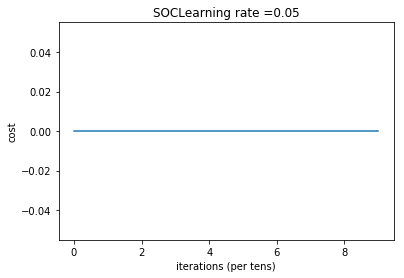

In [41]:
parameters = different_result(X,Y_SOC,0.05,100,"SOC")

In [42]:
y_test_soc,c = L_model_forward(X_test,parameters)
y_test_soc.shape

(1, 727)

Cost after iteration 0: 0.000000
Cost after iteration 10: 0.000000
Cost after iteration 20: 0.000000
Cost after iteration 30: 0.000000
Cost after iteration 40: 0.000000
Cost after iteration 50: 0.000000
Cost after iteration 60: 0.000000
Cost after iteration 70: 0.000000
Cost after iteration 80: 0.000000
Cost after iteration 90: 0.000000


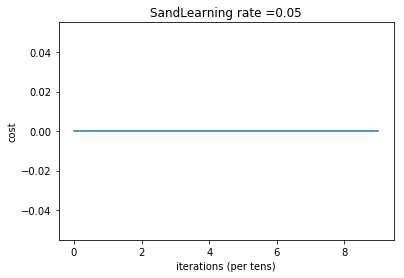

In [43]:
parameters =different_result(X,Y_Sand,0.05,100,"Sand")

In [44]:
y_test_sand,c = L_model_forward(X_test,parameters)
y_test_sand.shape

(1, 727)

Cost after iteration 0: 0.000000
Cost after iteration 10: 0.000000
Cost after iteration 20: 0.000000
Cost after iteration 30: 0.000000
Cost after iteration 40: 0.000000
Cost after iteration 50: 0.000000
Cost after iteration 60: 0.000000
Cost after iteration 70: 0.000000
Cost after iteration 80: 0.000000
Cost after iteration 90: 0.000000


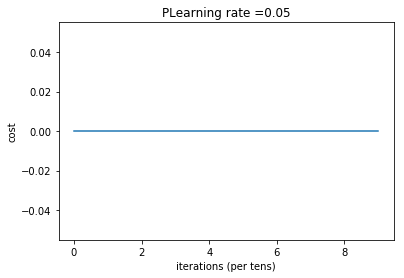

In [30]:
parameters = different_result(X,Y_P,0.05,100,"P")

In [45]:
y_test_P,c = L_model_forward(X_test,parameters)
y_test_P.shape

(1, 727)

Cost after iteration 0: 0.000000
Cost after iteration 10: 0.000000
Cost after iteration 20: 0.000000
Cost after iteration 30: 0.000000
Cost after iteration 40: 0.000000
Cost after iteration 50: 0.000000
Cost after iteration 60: 0.000000
Cost after iteration 70: 0.000000
Cost after iteration 80: 0.000000
Cost after iteration 90: 0.000000


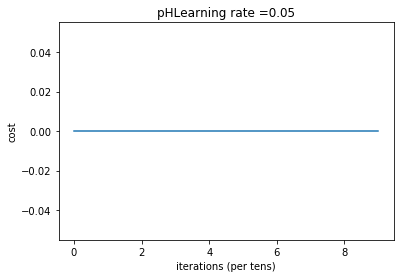

In [46]:
parameters = different_result(X,Y_pH,0.05,100,"pH")

In [47]:
y_test_pH,c = L_model_forward(X_test,parameters)
y_test_pH.shape

(1, 727)

Cost after iteration 0: 0.000000
Cost after iteration 10: 0.000000
Cost after iteration 20: 0.000000
Cost after iteration 30: 0.000000
Cost after iteration 40: 0.000000
Cost after iteration 50: 0.000000
Cost after iteration 60: 0.000000
Cost after iteration 70: 0.000000
Cost after iteration 80: 0.000000
Cost after iteration 90: 0.000000


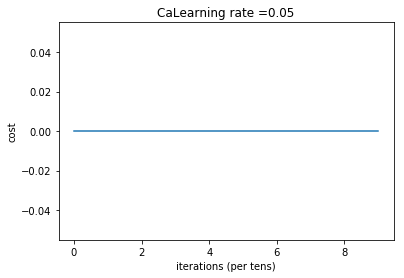

In [48]:
parameters = different_result(X,Y_Ca,0.05,100,"Ca")

In [49]:
y_test_Ca,c = L_model_forward(X_test,parameters)
y_test_Ca.shape

(1, 727)

In [56]:
pidn = pidn.as_matrix()

In [60]:
from collections import OrderedDict

In [61]:
result = OrderedDict([ ('PIDN', pidn),
          ('Ca', y_test_Ca[0]),
          ('P',  y_test_P[0]),
          ('pH', y_test_pH[0]),
          ('SOC',y_test_soc[0]),
          ('Sand',y_test_sand[0]) ] )

In [63]:
df_sub = pd.DataFrame.from_dict(result)
df_sub.head()

,PIDN,Ca,P,pH,SOC,Sand
0,09gt9UK5,0.003701,0.003701,0.003701,0.003701,0.003701
1,0BVvxJ6a,0.004504,0.004504,0.004504,0.004504,0.004504
2,0KbdgApg,0.004294,0.004294,0.004294,0.004294,0.004294
3,0MnuuduB,0.004355,0.004355,0.004355,0.004355,0.004355
4,0PcIsF9z,0.001374,0.001374,0.001374,0.001374,0.001374


In [66]:
df_sub.to_csv('submission.csv',index=False)